In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])

In [4]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [9]:
# tts
x = df.iloc[:, 1:]
y = df.iloc[:,0]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [55]:
x_train['Age_imputed'] = x_train['Age']
x_test['Age_imputed'] = x_test['Age']

In [56]:
mask = x_train['Age_imputed'].isnull()
x_train['Age_imputed'][mask] = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values

C:\Users\UTSAV\AppData\Local\Temp\ipykernel_14272\520116006.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train['Age_imputed'][mask] = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values


In [57]:
x_test['Age_imputed'][x_test['Age_imputed'].isnull()] = x_test['Age'].dropna().sample(x_test['Age'].isnull().sum()).values

C:\Users\UTSAV\AppData\Local\Temp\ipykernel_14272\3885208445.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_test['Age_imputed'][x_test['Age_imputed'].isnull()] = x_test['Age'].dropna().sample(x_test['Age'].isnull().sum()).values


In [58]:
# x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values

<Axes: ylabel='Density'>

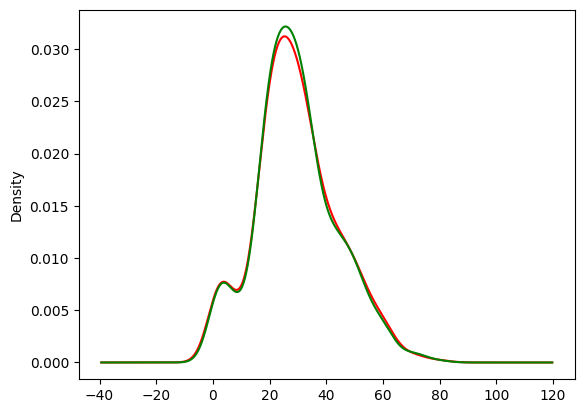

In [59]:
# plot

x_train['Age'].plot(kind='kde', color='red', label='Original')
x_train['Age_imputed'].plot(kind='kde', color='green', label='Imputed')

In [60]:
new_xtrain = x_train.loc[:, 'Fare':'Age_imputed']
new_xtest = x_test.loc[:, 'Fare':'Age_imputed']

In [61]:
x_train

,Age,Fare,Age_imputed
331,45.5,28.5000,45.5
733,23.0,13.0000,23.0
382,32.0,7.9250,32.0
704,26.0,7.8542,26.0
813,6.0,31.2750,6.0
...,...,...,...
106,21.0,7.6500,21.0
270,NaN,31.0000,54.0
860,41.0,14.1083,41.0
435,14.0,120.0000,14.0


In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [63]:
clf = LinearRegression()
clf2 = DecisionTreeClassifier()

clf.fit(new_xtrain, y_train)
clf2.fit(new_xtrain, y_train)

pred = clf.predict(new_xtest)
pred2 = clf.predict(new_xtest)


In [64]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

print(r2_score(y_test, pred))
print(r2_score(y_test, pred2))

0.0933092466295734
0.0933092466295734
